# 第1章

In [100]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

In [3]:
beer = pd.read_csv("5-1-1-beer.csv")
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


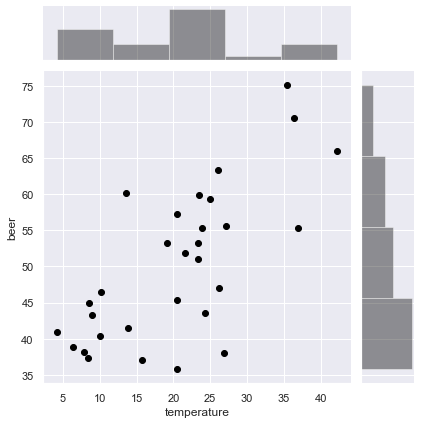

In [4]:
sns.jointplot(x="temperature", y="beer",
             data=beer, color="black")

In [5]:
lm_model = smf.ols(formula="beer ~ temperature",
                  data=beer).fit()

In [6]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.11e-05
Time:                        00:08:47   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
null_model = smf.ols("beer ~ 1", data=beer).fit()

In [8]:
null_model.aic

227.94194972563105

In [9]:
lm_model.aic

208.90902935575437

In [10]:
lm_model.llf

-102.45451467787719

In [11]:
lm_model.df_model

1.000

In [12]:
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

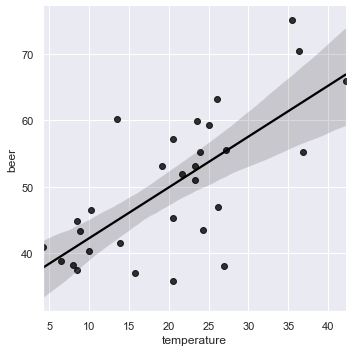

In [14]:
sns.lmplot(x="temperature", y="beer", data=beer,
          scatter_kws={"color":"black"},
          line_kws={"color":"black"})

In [15]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [19]:
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

In [20]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [21]:
lm_model.predict(pd.DataFrame({"temperature":[20]}))

0    49.918767
dtype: float64

In [22]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.91876701095054

In [23]:
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [24]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [25]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [26]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat-mu)**2) / np.sum((y-mu)**2)

0.503959323061187

In [27]:
lm_model.rsquared

0.5039593230611856

In [28]:
np.sum((yhat-mu)**2) + sum(resid**2)

3277.114666666669

In [30]:
np.sum((y-mu)**2)

3277.1146666666655

In [31]:
1 - np.sum(resid**2) / np.sum((y-mu)**2)

0.5039593230611857

In [32]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n-s-1)) /
    (np.sum((y-mu)**2) / (n-1)))

0.48624358459908523

In [33]:
lm_model.rsquared_adj

0.4862435845990851

<AxesSubplot:>

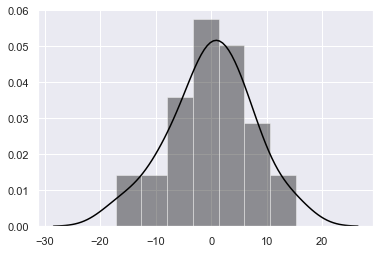

In [34]:
sns.distplot(resid, color="black")

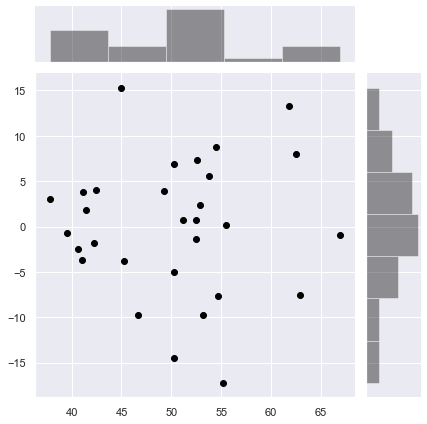

In [36]:
sns.jointplot(lm_model.fittedvalues, resid,
             joint_kws={"color":"black"},
             marginal_kws={"color":"black"})

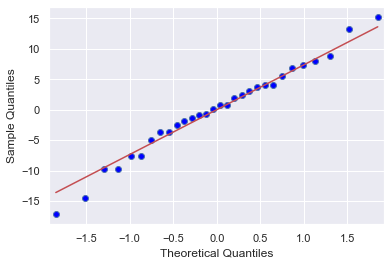

In [37]:
fig = sm.qqplot(resid, line="s")

In [38]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [39]:
1 / 31

0.032

In [40]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [41]:
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

# 第2章

In [42]:
weather = [
    "cloudy", "cloudy",
    "rainy", "rainy",
    "sunny", "sunny"
]
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({
    "beer": beer,
    "weather": weather
})
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

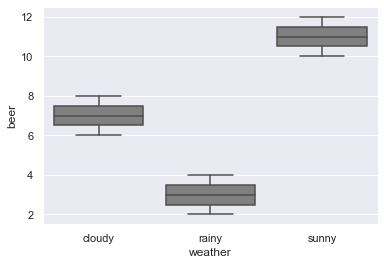

In [43]:
sns.boxplot(x="weather", y="beer",
           data=weather_beer, color="gray")

In [44]:
weather_beer.groupby("weather").mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [46]:
effect = [7, 7, 3, 3, 11, 11]

mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2)
squares_model

64.0

In [48]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [49]:
squares_resid = np.sum(resid ** 2)
squares_resid

6

In [50]:
df_model = 2
df_resid = 3

In [51]:
variance_model = squares_model / df_model
variance_model

32.0

In [52]:
variance_resid = squares_resid / df_resid
variance_resid

2.0

In [53]:
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [54]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

In [55]:
anova_model = smf.ols("beer ~ weather",
                     data=weather_beer).fit()

In [56]:
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [57]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [58]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [59]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [60]:
beer = pd.read_csv("5-1-1-beer.csv")

lm_model = smf.ols(formula="beer ~ temperature",
                  data=beer).fit()

In [61]:
df_lm_model = 1
df_lm_resid = 28

In [62]:
lm_effect = lm_model.fittedvalues

lm_resid = lm_model.resid

mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model

squares_lm_resid = np.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid

f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.44698368850461

In [63]:
sm.stats.anova_lm(lm_model, typ=2)

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [64]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.11e-05
Time:                        22:36:46   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 第3章

In [65]:
sales = pd.read_csv("5-3-1-lm-model.csv")
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


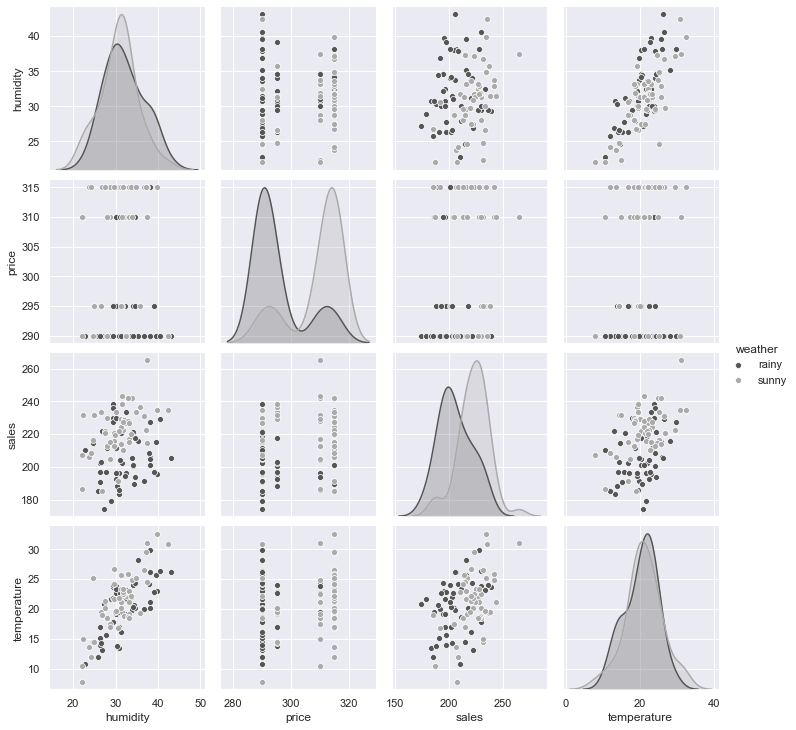

In [67]:
sns.pairplot(data=sales, hue="weather", palette="gray")

In [69]:
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [70]:
sm.stats.anova_lm(lm_dame, typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


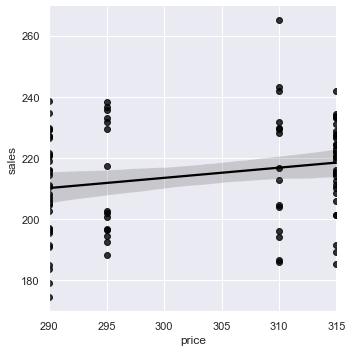

In [71]:
sns.lmplot(x="price", y="sales", data=sales,
          scatter_kws={"color":"black"},
          line_kws={"color":"black"})

In [72]:
sales.groupby("weather").mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


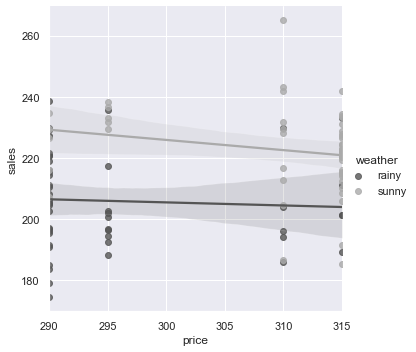

In [73]:
sns.lmplot(x="price", y="sales", data=sales,
          hue="weather", palette="gray")

In [74]:
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales).fit()

lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [75]:
sm.stats.anova_lm(lm_sales, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [76]:
lm_sales2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales).fit()

sm.stats.anova_lm(lm_sales2, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [77]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [78]:
lm_sales2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [79]:
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [80]:
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = np.sum(mod_1.resid ** 2)
resid_sq_1

21917.565

In [81]:
resid_sq_null - resid_sq_1

7050.960899999995

In [82]:
sm.stats.anova_lm(mod_1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,31.527,0.0
Residual,98.0,21917.565,223.649,NaN,NaN


In [83]:
mod_2 = smf.ols(
    "sales ~ weather + humidity", sales).fit()
resid_sq_2 = np.sum(mod_2.resid ** 2)
resid_sq_2

20137.963897851758

In [84]:
resid_sq_1 - resid_sq_2

1779.601102148241

In [85]:
sm.stats.anova_lm(mod_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,33.963,0.000
humidity,1.0,1779.601,1779.601,8.572,0.004
Residual,97.0,20137.964,207.608,NaN,NaN


In [87]:
mod_2_2 = smf.ols(
    "sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = np.sum(mod_2_2.resid ** 2)
resid_sq_2_2

18102.78642671223

In [88]:
mod_3_2 = smf.ols(
    "sales ~ weather + temperature + humidity", sales).fit()
resid_sq_3_2 = np.sum(mod_3_2.resid ** 2)
resid_sq_3_2

18061.11936158843

In [89]:
resid_sq_2_2 - resid_sq_3_2

41.667065123801876

In [90]:
sm.stats.anova_lm(mod_3_2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,37.478,0.000
temperature,1.0,3814.779,3814.779,20.277,0.000
humidity,1.0,41.667,41.667,0.221,0.639
Residual,96.0,18061.119,188.137,NaN,NaN


In [91]:
mod_full = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    sales).fit()
resid_sq_full = np.sum(mod_full.resid ** 2)
resid_sq_full

17242.716942366485

In [92]:
mod_non_humi = smf.ols(
    "sales ~ weather + temperature + price",
    sales).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

17299.142016107664

In [94]:
resid_sq_non_humi - resid_sq_full

56.425073741178494

In [95]:
sm.stats.anova_lm(mod_full, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [96]:
mod_full.compare_f_test(mod_non_humi)

(0.31087803756965626, 0.5784533427120666, 1.0)

In [97]:
sm.stats.anova_lm(mod_non_humi, typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


In [98]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

In [99]:
print("全変数入りモデル : ", mod_full.aic.round(3))
print("湿度抜きモデル : ", mod_non_humi.aic.round(3))

全変数入りモデル :  808.785
湿度抜きモデル :  807.112
